SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-277-g703d37e Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 77.7MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 215MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 267MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 264MB/s]

100%|██████████| 170M/170M [00:01<00:00, 157MB/s]



PREDICT

In [ ]:
%cd {HOME}/drive/MyDrive/yolov5-master

/content/drive/MyDrive/yolov5-master


In [ ]:
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference

segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 2023-12-4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/yolov5-master/data/images/bus.jpg: 640x480 4 persons, 1 bus, 53.5ms
Speed: 0.7ms pre-process, 53.5ms inference, 647.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference12


/content/drive/MyDrive/yolov5-master


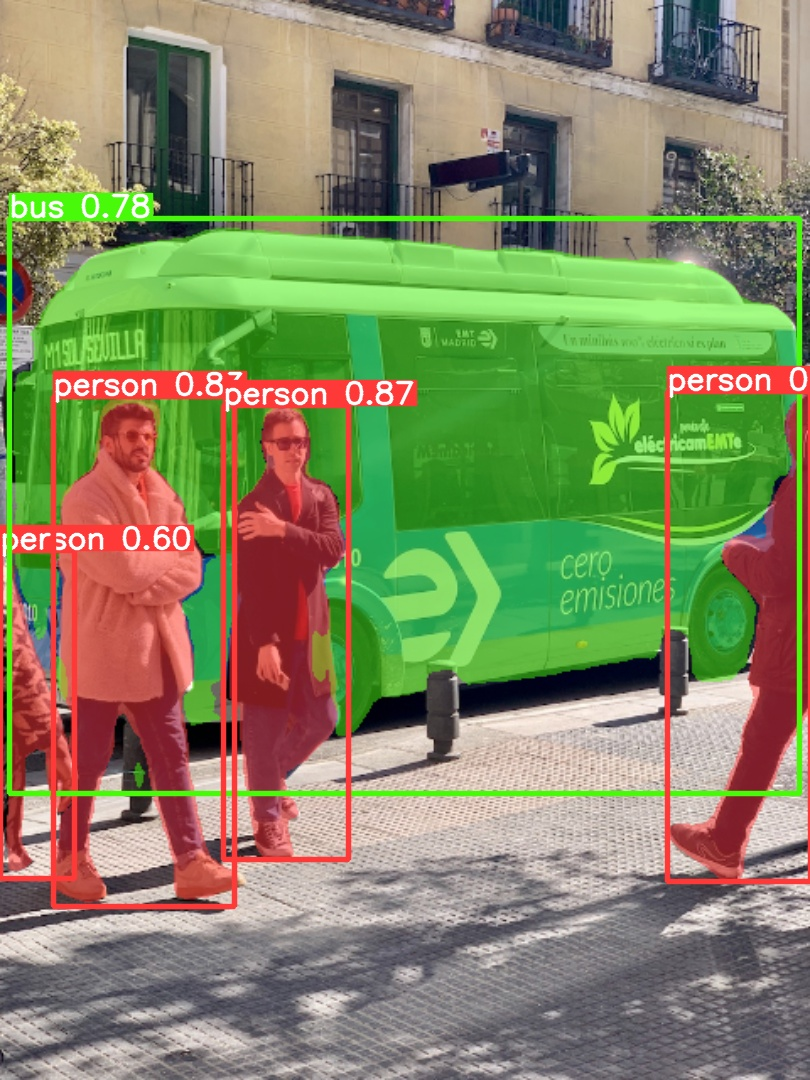

In [ ]:
%cd {HOME}/drive/MyDrive/yolov5-master
display.Image(filename=f"{HOME}/drive/MyDrive/yolov5-master/runs/predict-seg/test-inference3/bus.jpg", width=600)

TRAIN

In [ ]:
%cd {HOME}/drive/MyDrive/yolov5-master
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="D3pOhBcnTUJ1uZTMsWBN")
project = rf.workspace("fyp-lyisg").project("fyp-dataset-lama")
dataset = project.version(13).download("yolov5")

/content/drive/MyDrive/yolov5-master
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
  

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FYP-DATASET-LAMA-13 in yolov5pytorch:: 100%|██████████| 4556/4556 [00:33<00:00, 134.87it/s]


In [ ]:
%cd {HOME}/drive/MyDrive/yolov5-master
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights weights/yolov5s-seg.pt --name yolov5

/content/drive/MyDrive/yolov5-master
2024-01-18 06:24:45.542376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 06:24:45.542425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 06:24:45.543812: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=weights/yolov5s-seg.pt, cfg=, data=/content/drive/MyDrive/yolov5-master/FYP-DATASET-LAMA-13/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image

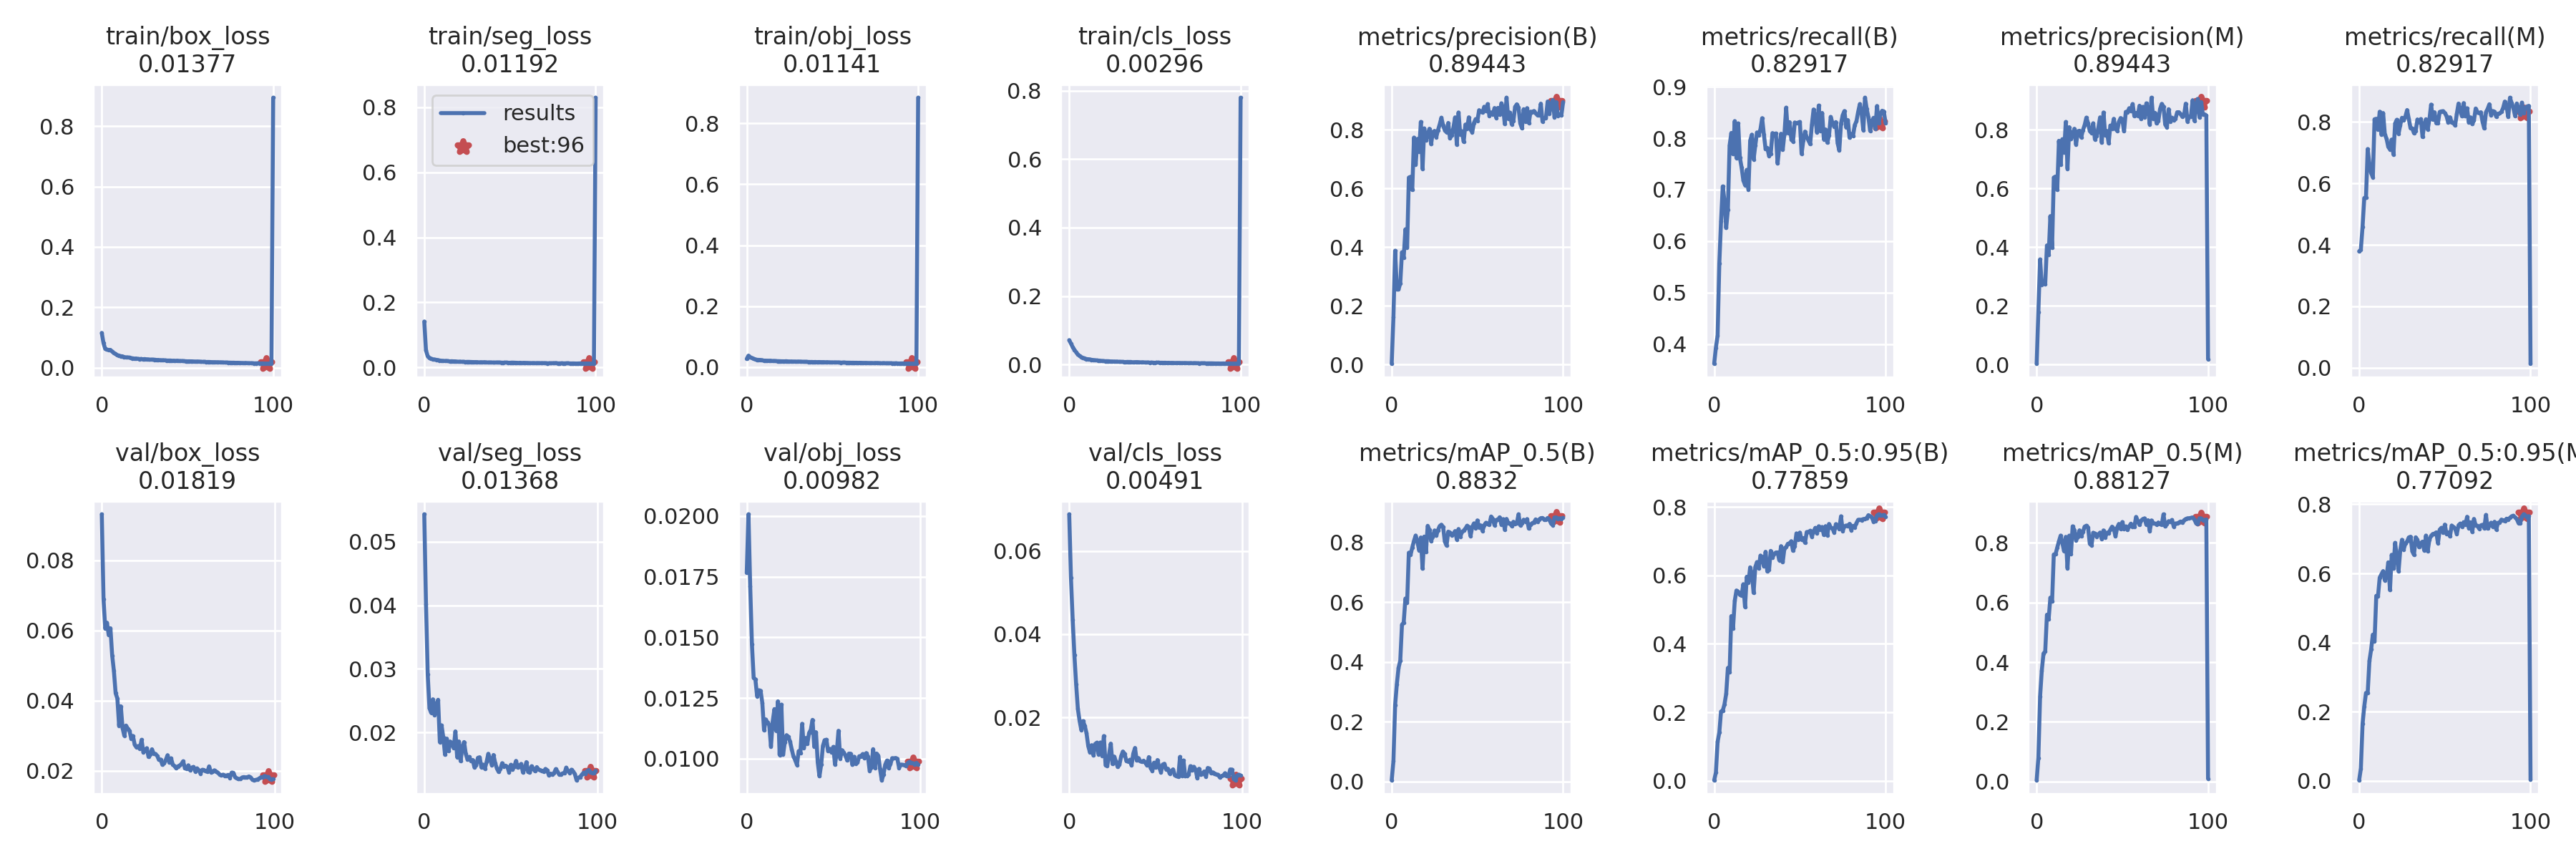

In [ ]:
display.Image(filename=f'{HOME}/drive/MyDrive/yolov5-master/runs/train-seg/yolov54/results.png', width=1200)

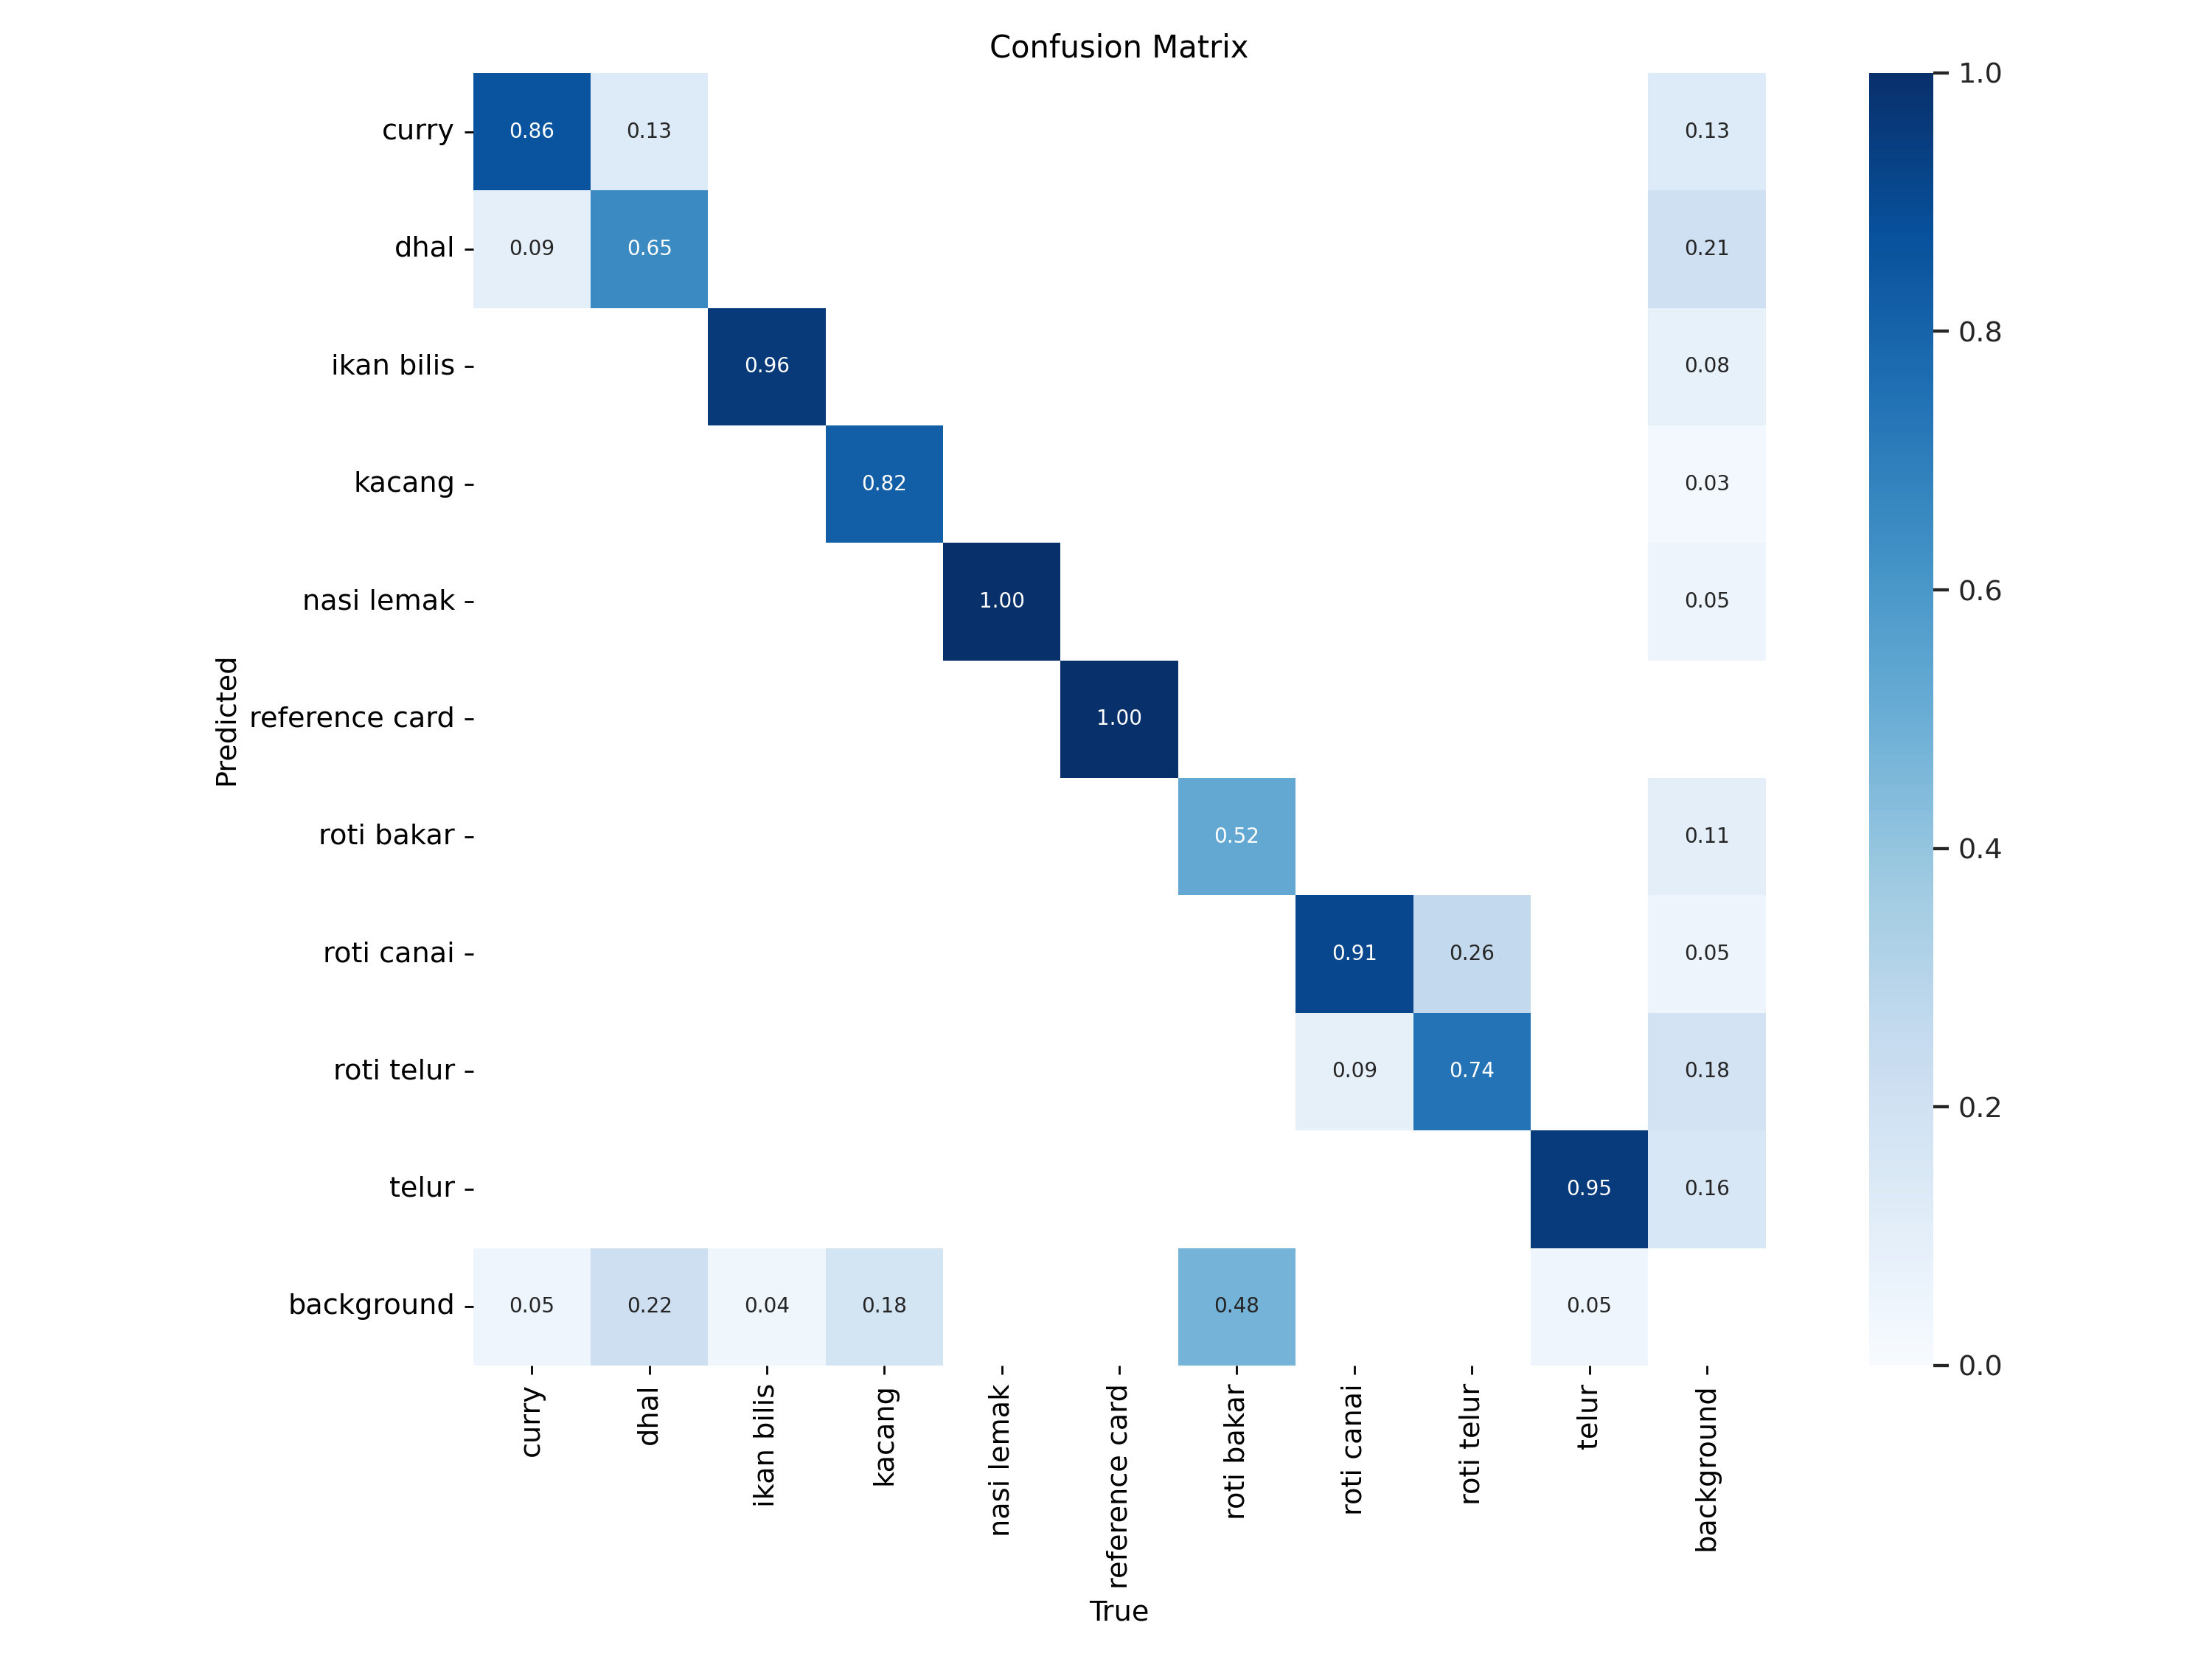

In [ ]:
display.Image(filename=f'{HOME}/drive/MyDrive/yolov5-master/runs/train-seg/yolov54/confusion_matrix.png', width=900)

In [ ]:
%cd {HOME}/drive/MyDrive/yolov5-master
!python segment/val.py --weights runs/train-seg/yolov54/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name yolov5

/content/drive/MyDrive/yolov5-master
segment/val: data=/content/drive/MyDrive/yolov5-master/FYP-DATASET-LAMA-10/data.yaml, weights=['runs/train-seg/yolov54/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=yolov5, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2023-12-4 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7422695 parameters, 0 gradients, 25.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5-master/FYP-DATASET-LAMA-10/valid/labels.cache... 125 images, 0 backgrounds, 0 corrupt: 100% 125/125 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.26s/it]
                   all        125

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")

example_image_name = os.listdir(split_path)[10]
print(example_image_name)
print("---------------------------------------")
example_image_path = os.path.join(split_path, example_image_name)

!python segment/predict.py --img 320 --weights runs/train-seg/yolov54/weights/best.pt --source {example_image_path} --name yolov5

599_jpg.rf.8ddcc58dfef39d07b53744c6a69a1405.jpg
---------------------------------------
segment/predict: weights=['runs/train-seg/yolov54/weights/best.pt'], source=/content/drive/MyDrive/yolov5-master/FYP-DATASET-LAMA-10/test/images/599_jpg.rf.8ddcc58dfef39d07b53744c6a69a1405.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 2023-12-4 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7422695 parameters, 0 gradients, 25.8 GFLOPs
image 1/1 /content/drive/MyDrive/yolov5-master/FYP-DATASET-LAMA-10/test/images/599_jpg.rf.8ddcc58dfef39d07b53744c6a69a1405.j

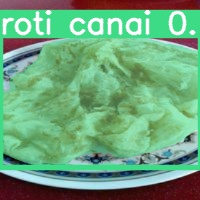

In [ ]:
display.Image(filename=f"{HOME}/drive/MyDrive/yolov5-master/runs/predict-seg/yolov5/{example_image_name}", width=500)